ML Course, Bogotá, Colombia  (&copy; Josh Bloom; June 2019)

In [145]:
%run ../talktools.py

<Figure size 432x288 with 0 Axes>

<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">

Source: http://www.asimovinstitute.org/neural-network-zoo/

<img src="https://www.evernote.com/l/AUU9p3_1J5NJX61cCzZPOPc76jm68et-pUgB/image.png">

Source: http://www.wsdm-conference.org/2016/slides/WSDM2016-Jeff-Dean.pdf
This is a good, high-level overview of what's important/current in DNNs.

### Notes:

* Google has some really weird practices, as in a entire single repository for all the software engineer and still using/stuck with `Python 2.6`... wtf?

### Some references/Statements

- "Deep learning" (Nature 2015) http://www.nature.com/nature/journal/v521/n7553/full/nature14539.html

- "HYPING ARTIFICIAL INTELLIGENCE, YET AGAIN" http://www.newyorker.com/tech/elements/hyping-artificial-intelligence-yet-again

- *"Creating a deep learning model is, ironically, a highly manual process. Training a model takes a long time, and even for the top practitioners, it is a hit or miss affair where you don’t know whether it will work until the end. No mature tools exist to ensure models train successfully, or to ensure that the original set up is done appropriately for the data."* -- J. Howard (Fast.ai; http://www.fast.ai/2016/10/07/fastai-launch/)

## Convolutional Neural Nets (ConvNets)

NNs built for images (or more generally, inputs with spatial structure).

### Key Ideas: 
  - layers see only parts of each image (effectively all other weights are zero).
  - some layers do simple operations on previous layers to reduce dimensionality (e.g., take the largest value in a a 3x3 range)
  - "Every Layer has a simple API: It transforms an input 3D volume to an output 3D volume with some differentiable function that may or may not have parameters."
 
<img src="http://cs231n.github.io/assets/cnn/cnn.jpeg">

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg">

"An example input volume in red (e.g. a 32x32x3 CIFAR-10 image), and an example volume of neurons in the first Convolutional layer. Each neuron in the convolutional layer is connected only to a local region in the input volume spatially, but to the full depth (i.e. all color channels). Note, there are multiple neurons (5 in this example) along the depth, all looking at the same region in the input - see discussion of depth columns in text below. "

cf. http://cs231n.github.io/convolutional-networks/

<img src="http://www.nature.com/nature/journal/v521/n7553/images/nature14539-f2.jpg">
Source: http://www.nature.com/nature/journal/v521/n7553/fig_tab/nature14539_F2.html

### Notes:

* When linearizing 2D/3D/more arrays/images you lose information about the correlations/relations between pixels near to each other, or independence of pixels far from each other and so on.
* Convolutional is useful for some sort of 2d/3D data arrays that have some sense of spatial information correlation/relevance.

### Filter banks

  http://setosa.io/ev/image-kernels/

### Pooling

<img src="http://cs231n.github.io/assets/cnn/pool.jpeg" width="40%">
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" width="40%">
Source: http://cs231n.github.io/convolutional-networks/

In [1]:
import datetime, os

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras import backend as K
import tensorflow as tf

# Print keras version
print(tensorflow.keras.__version__)

2.2.4-tf


In [2]:
from tensorflow.keras.utils import to_categorical

fashion_mnist = tf.keras.datasets.fashion_mnist

nb_classes = 10
batch_size = 128


(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # scale the images to 0-1

# convert class vectors to binary class matrices
Y_train =  to_categorical(y_train, nb_classes)
Y_test =  to_categorical(y_test, nb_classes)

input_shape = x_train[0].shape  + (1,)
input_shape

4423680/4422102 [==============================] - 1s 0us/step


(28, 28, 1)

In [3]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
# add with tf.device('/gpu:0'): if on GPU

model = Sequential()

# Produce 32 filters and do this in 3x3 kernels/patches
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(BatchNormalization())  # Everytime I have a batch of data that has gone through, kinda take the average
# ↑ That stops things from blowing up. This is just one way to do it.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))  # Ignore some of the nodes during train time.


model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))


model.add(Conv2D(128, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(rate=0.1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Dropout
model.add(Dropout(rate=0.5))
    
model.add(Dense(32, activation='relu'))
    

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Notes:

* There's no good theory on whether you should use normalization before or after activation... :/.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0

In [6]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
# define path to save model
model_path = f'nn_results/colombia_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

logdir = os.path.join("nn_results", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.75,
                              patience=2, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = tf.keras.callbacks.CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0.001, 
                                             patience=3, \
                                             verbose=1, mode='auto')

model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=1)

model.fit(x=x_train.reshape(-1,28,28,1), 
          y=Y_train, 
          epochs=20,
          batch_size=batch_size,
          validation_data=(x_test.reshape(-1,28,28,1), Y_test), 
          callbacks=[tensorboard_callback, reduce_lr, csv_logger, earlystop, model_check])

W0606 10:10:20.740015 139722313889600 deprecation.py:323] From /home/mefisto/anaconda3/envs/ml_course/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Training ... nn_results/colombia_nn_2019-06-06T15:10.h5
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.6789 - accuracy: 0.7539

W0606 10:11:12.197213 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:11:12.199683 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:11:12.200253 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 51s 843us/sample - loss: 0.6785 - accuracy: 0.7541 - val_loss: 0.4578 - val_accuracy: 0.8543
Epoch 2/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8570

W0606 10:12:02.084524 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:12:02.085227 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:12:02.085745 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 50s 831us/sample - loss: 0.4052 - accuracy: 0.8569 - val_loss: 0.3354 - val_accuracy: 0.8754
Epoch 3/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.3472 - accuracy: 0.8759

W0606 10:12:51.959115 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:12:51.959808 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:12:51.960361 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 50s 831us/sample - loss: 0.3471 - accuracy: 0.8759 - val_loss: 0.3233 - val_accuracy: 0.8862
Epoch 4/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8880

W0606 10:13:41.786864 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:13:41.787683 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:13:41.789461 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 50s 830us/sample - loss: 0.3147 - accuracy: 0.8880 - val_loss: 0.2927 - val_accuracy: 0.8945
Epoch 5/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2920 - accuracy: 0.8960

W0606 10:14:31.520174 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:14:31.520847 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:14:31.521393 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 50s 829us/sample - loss: 0.2921 - accuracy: 0.8960 - val_loss: 0.3164 - val_accuracy: 0.8830
Epoch 6/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.9004

W0606 10:15:21.439640 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:15:21.440289 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:15:21.440822 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 50s 832us/sample - loss: 0.2760 - accuracy: 0.9004 - val_loss: 0.2972 - val_accuracy: 0.8895
Epoch 7/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9049

W0606 10:16:11.537795 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:16:11.538640 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:16:11.539217 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 50s 835us/sample - loss: 0.2664 - accuracy: 0.9049 - val_loss: 0.2707 - val_accuracy: 0.8975
Epoch 8/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.9098

W0606 10:17:01.398705 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:17:01.399610 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:17:01.400166 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 50s 831us/sample - loss: 0.2494 - accuracy: 0.9098 - val_loss: 0.2580 - val_accuracy: 0.9033
Epoch 9/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.9126

W0606 10:17:52.967988 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:17:52.968655 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:17:52.969215 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 52s 859us/sample - loss: 0.2428 - accuracy: 0.9126 - val_loss: 0.3018 - val_accuracy: 0.8916
Epoch 10/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.9164

W0606 10:18:44.204385 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:18:44.205043 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:18:44.206077 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 51s 854us/sample - loss: 0.2307 - accuracy: 0.9164 - val_loss: 0.2537 - val_accuracy: 0.9058
Epoch 11/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2266 - accuracy: 0.9178

W0606 10:19:41.967304 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:19:41.967946 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:19:41.968565 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 58s 963us/sample - loss: 0.2266 - accuracy: 0.9178 - val_loss: 0.2859 - val_accuracy: 0.8948
Epoch 12/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9209

W0606 10:20:36.526576 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:20:36.527286 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:20:36.527929 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 55s 909us/sample - loss: 0.2181 - accuracy: 0.9209 - val_loss: 0.2640 - val_accuracy: 0.9102
Epoch 13/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2085 - accuracy: 0.9239

W0606 10:21:27.473782 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:21:27.474468 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:21:27.475216 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 51s 849us/sample - loss: 0.2086 - accuracy: 0.9239 - val_loss: 0.2558 - val_accuracy: 0.9104
Epoch 14/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2006 - accuracy: 0.9252

W0606 10:22:19.339411 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:22:19.340074 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:22:19.340645 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 52s 864us/sample - loss: 0.2006 - accuracy: 0.9252 - val_loss: 0.2815 - val_accuracy: 0.9020
Epoch 15/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.1973 - accuracy: 0.9264

W0606 10:23:11.100559 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:23:11.101350 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:23:11.102065 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 52s 863us/sample - loss: 0.1973 - accuracy: 0.9263 - val_loss: 0.2438 - val_accuracy: 0.9145
Epoch 16/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9280

W0606 10:24:04.197487 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:24:04.198142 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:24:04.198800 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 53s 885us/sample - loss: 0.1946 - accuracy: 0.9279 - val_loss: 0.2590 - val_accuracy: 0.9112
Epoch 17/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9293

W0606 10:24:55.230066 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:24:55.230758 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:24:55.231326 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 51s 851us/sample - loss: 0.1870 - accuracy: 0.9293 - val_loss: 0.2542 - val_accuracy: 0.9123
Epoch 18/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9311

W0606 10:25:46.577352 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:25:46.578104 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:25:46.578729 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 51s 856us/sample - loss: 0.1875 - accuracy: 0.9311 - val_loss: 0.2588 - val_accuracy: 0.9107
Epoch 19/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.9322

W0606 10:26:38.108279 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:26:38.109174 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:26:38.109697 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 52s 859us/sample - loss: 0.1794 - accuracy: 0.9321 - val_loss: 0.2614 - val_accuracy: 0.9115
Epoch 20/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.1749 - accuracy: 0.9348

W0606 10:27:30.702502 139722313889600 callbacks.py:1823] Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:27:30.703276 139722313889600 callbacks.py:1249] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
W0606 10:27:30.703854 139722313889600 callbacks.py:986] Can save best model only with val_acc available, skipping.


60000/60000 [==============================] - 53s 877us/sample - loss: 0.1749 - accuracy: 0.9349 - val_loss: 0.2731 - val_accuracy: 0.9056


## Visualization of the layers

From François Chollet (“DEEP LEARNING with Python”):

Intermediate activations are “useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.”

“The representations learned by convnets are highly amenable to visualization, in large part because they’re representations of visual concepts. Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its activation, the output of the activation function). This gives a view into how an input is decomposed into the different filters learned by the network. Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.”

Following from https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md

In [7]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    keep = True
    for t in ["dropout", "normalization", "flatten", "dense", "activation"]:
        if layer.name.find(t) != -1:
            keep = False
    if keep:
        layer_outputs.append(layer.output)
        layer_names.append(layer.name) 
        
activation_model = tensorflow.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[2].reshape(1,28,28,1)) # Returns a list of five Numpy arrays: one array per layer activation

In [8]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
# This is the output, 26x26 images with 32 kernels

(1, 26, 26, 32)


/home/mefisto/anaconda3/envs/ml_course/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


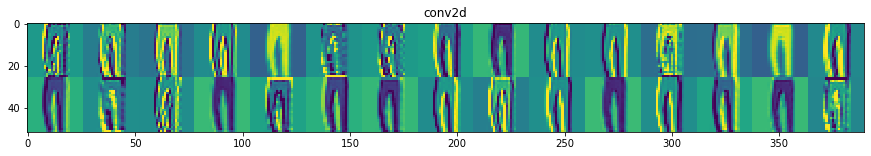

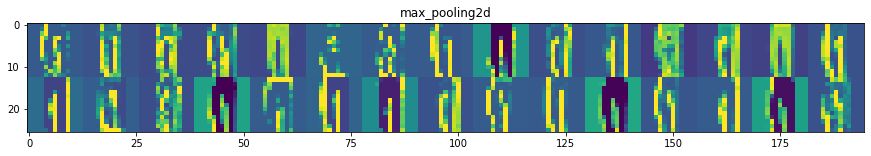

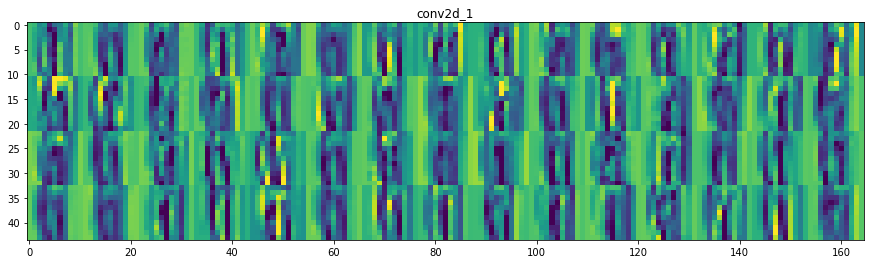

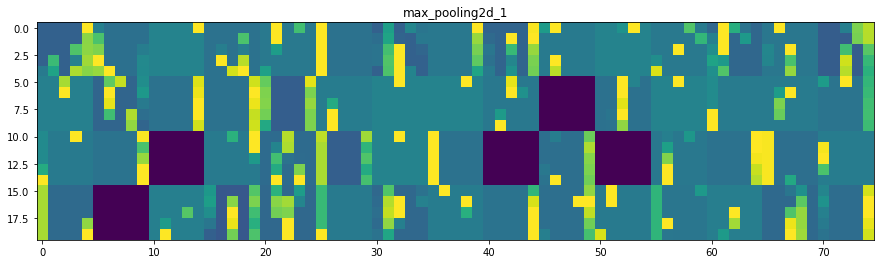

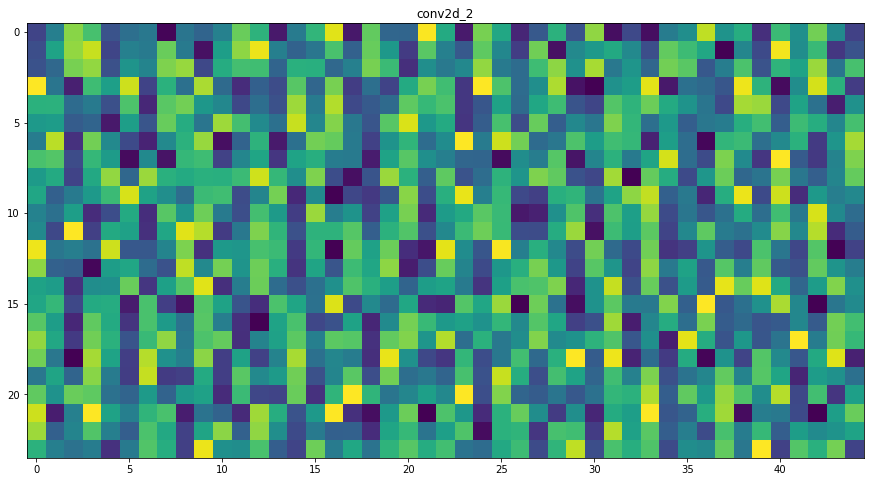

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

images_per_row = 15

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1]   # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Data augmentation

SOME PICTURE OF CATS HERE THAT I DON'T HAVE.

### Notes:

It's obvious that enlarging the data helps but it's not always obvious to enlarge the dataset.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# creating the data aumentation genreators for both the training images and the training label masks
data_gen_args = dict(featurewise_center=False,
                     featurewise_std_normalization=False,
                     rotation_range=15.,
                     rescale=1.0,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode = 'nearest')

image_datagen = ImageDataGenerator(**data_gen_args)  
# ↑ Data generator picks/produces a random pic from the data set and apply the transformations... ?

seed = 42
batch_size = 128


(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # scale the images to 0-1

# convert class vectors to binary class matrices
Y_train =  to_categorical(y_train, nb_classes)
Y_test =  to_categorical(y_test, nb_classes)

input_shape = x_train[0].shape  + (1,)

image_generator = image_datagen.flow(
    np.expand_dims(x_train, axis=3),  Y_train,
    shuffle = True,
    batch_size=batch_size,
    seed=seed)

In [16]:
type(image_generator)

keras_preprocessing.image.numpy_array_iterator.NumpyArrayIterator

In [17]:
rez = image_generator.next()

In [23]:
# 128 Images of 28x28
rez[0].shape

(128, 28, 28, 1)

In [22]:
# Classes
rez[1].shape

(128, 10)

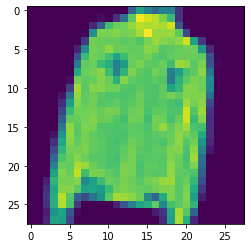

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(rez[0][5][:,:,0])

In [27]:
# add with tf.device('/gpu:0'): if on GPU

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))


model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))


model.add(Conv2D(128, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(rate=0.1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Dropout
model.add(Dropout(rate=0.5))
    
model.add(Dense(32, activation='relu'))
    

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [28]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
# define path to save model
model_path = f'nn_results/colombia_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

logdir = os.path.join("nn_results", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.75,
                              patience=2, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = tf.keras.callbacks.CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, 
                                             patience=3, \
                                             verbose=1, mode='auto')

model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)

# Instead of .fit it's a .fit_generator because we are using generators and batches
model.fit_generator(image_generator,
          epochs=20,
          validation_data=(x_test.reshape(-1,28,28,1), Y_test), 
          callbacks=[tensorboard_callback, reduce_lr, csv_logger, earlystop, model_check])

Training ... nn_results/colombia_nn_2019-06-06T15:45.h5
Epoch 1/20
468/469 [============================>.] - ETA: 0s - loss: 0.8316 - accuracy: 0.6946
Epoch 00001: val_accuracy improved from -inf to 0.79530, saving model to nn_results/colombia_nn_2019-06-06T15:45.h5
469/469 [==============================] - 55s 118ms/step - loss: 0.8314 - accuracy: 0.6947 - val_loss: 0.5670 - val_accuracy: 0.7953
Epoch 2/20
468/469 [============================>.] - ETA: 0s - loss: 0.5446 - accuracy: 0.8002
Epoch 00002: val_accuracy improved from 0.79530 to 0.84490, saving model to nn_results/colombia_nn_2019-06-06T15:45.h5
469/469 [==============================] - 55s 118ms/step - loss: 0.5442 - accuracy: 0.8004 - val_loss: 0.4235 - val_accuracy: 0.8449
Epoch 3/20
468/469 [============================>.] - ETA: 0s - loss: 0.4719 - accuracy: 0.8267
Epoch 00003: val_accuracy improved from 0.84490 to 0.86980, saving model to nn_results/colombia_nn_2019-06-06T15:45.h5
469/469 [=========================

KeyboardInterrupt: 

### Notes:

So we basically did is augmenting the data set by rotating, flipping and doing stuff to the original data and feed that to our model with a generator, randomly.